In [21]:
import numpy as np
import matplotlib.pyplot as plt

Simulating a particle under a harmonic oscillator potential in one dimension, so it oscillates back and forth about the origin.

To simulate a harmonic oscillator, the hamiltonian of a harmonic oscillator is used
H = T + V

V == potential energy which is 1/2 * k * x^2.
As the particle is placed away from the origin the potential energy it experiences quadratically increases

Simulate particle with zero initial kinetic energy i.e p_0 = 0.
Using the velocity Verlet algorithm

Set the initial position to be at x_0 = 0.5 units

In [47]:
# Define timestep between simulations (delta_t)
delta_t = 0.0001

# Define k
k = 1
# Define mass of particls (m)
m = 1

# Define old position of the simulated particle (x_old)
x_0 = 1
x_old = 1

# Define old velocity of particle (u)
v_old = 0

# Define force on particle (F)
F_old = -k * x_old

# Define old particle acceleration (a)
a_old = F_old/m

# Define the variable time which initially starts off at zero (t)
t = 0

In [48]:
i = 0

# Lists for recording x and v and a.
recorded_x_1 = []
recorded_v_1 = []
recorded_a_1 = []

# Repeating algorithm
while i < 500001:
    
    # Using kinematic equations to get the new position, velocity and acceleration after each timestamp
    # Velocity Verlet algorithm:
    # Define new position of the simulated particle (x_new)
    x_new = x_old + v_old * delta_t + 1/2 * a_old * delta_t**2 # Velocity Verlet algorithm 1.
    
    # Define new force on particle
    F_new = -k * x_new
    
    # Define new particle acceleration
    a_new = F_new/m
    
    # Define new velocity of the simulated particle (v_new)
    v_new = v_old + 1/2 * (a_new + a_old) * delta_t # Velocity Verlet alogorithm 2.    
    
# Recording position, velocity, and acceleration every 10th step
    if i % 10 == 0:
        recorded_x_1 = np.append(recorded_x_1, x_new)
        recorded_v_1 = np.append(recorded_v_1, v_new)
        recorded_a_1 = np.append(recorded_a_1, a_new)
        
    # Update new x and v coordinates
    x_old = x_new
    v_old = v_new
    a_old = a_new
    F_old = F_new
    i += 1

(0.0, 20.0)

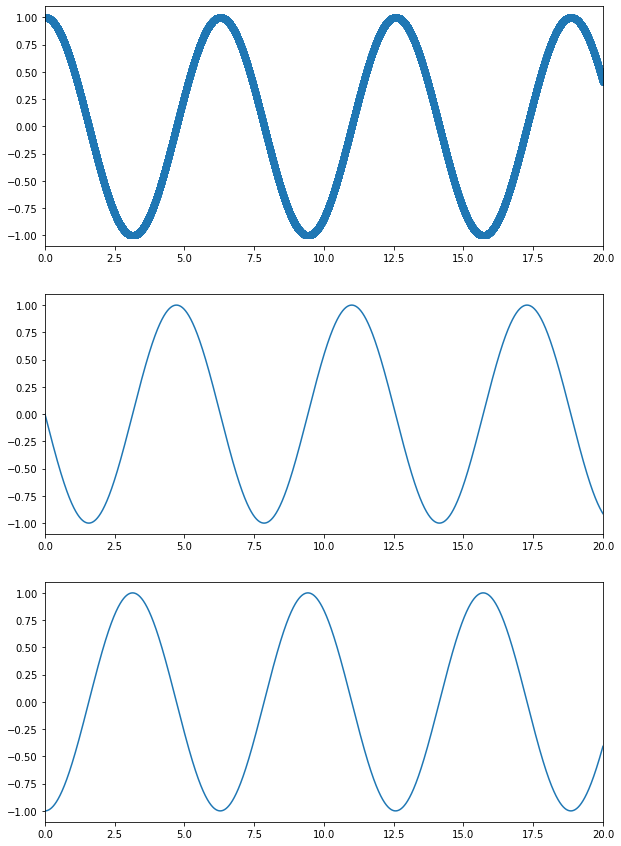

In [49]:
plt.figure(figsize = (10,15))

time = np.arange(0.0001, 500000*delta_t + delta_t*10, 0.001)

plt.subplot(3,1,1)
plt.plot(time, recorded_x_1, "o")
plt.xlim(0,20)
plt.subplot(3,1,2)
plt.plot(time, recorded_v_1)
plt.xlim(0,20)
plt.subplot(3,1,3)
plt.plot(time, recorded_a_1)
plt.xlim(0,20)

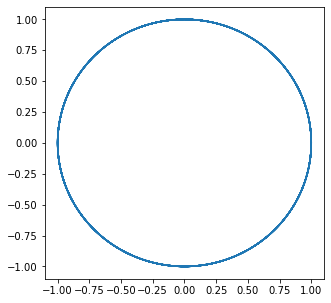

In [50]:
plt.figure(figsize = (5,5))
plt.plot(recorded_x_1,recorded_v_1)

Check that the Hamiltonian is conserved as it should be as it is not explicitly time dependent.

In [54]:
def H_1(x,v):
    return v**2/(2*m) + 1/2 * k * x**2

def T_1(v):
    return 1/2 * m * v**2

def V_1(x):
    return 1/2 * k * x**2



print(H_1(x_0, 0))
print(H_1(recorded_x_1, recorded_v_1)[:1000])



0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.

## Part 2

add a quartic term to the Hamiltonian.
The force is not F = -kx -4 lambda x^3

In [13]:
# Define the coefficient of the quartic as lambda
Lambda = .01

In [14]:
# Define timestep between simulations (delta_t)
delta_t = 0.005

# Define k
k = 1
# Define mass of particls (m)
m = 1

# Define old position of the simulated particle (x_old)
x_0 = 0.5
x_old = .5

# Define old velocity of particle (u)
v_old = 0

# Define force on particle (F)
F_old = -k * x_old - 4 * Lambda * x_old**3

# Define old particle acceleration (a)
a_old = F_old/m

# Define the variable time which initially starts off at zero (t)
t = 0

In [15]:
def simulation_2(x_old_2, v_old_2, a_old_2, F_old_2, delta_t_2):
    
    i = 0
    
    x_old = x_old_2 
    v_old = v_old_2 
    a_old = a_old_2 
    F_old = F_old_2 
    delta_t = delta_t_2
    
    # Lists for recording x and v and a.
    recorded_x = [x_old]
    recorded_v = [v_old]
    recorded_a = [a_old]

    # Repeating algorithm
    while i < 5001:

        # Using kinematic equations to get the new position, velocity and acceleration after each timestamp
        # Velocity Verlet algorithm:
        # Define new position of the simulated particle (x_new)
        x_new = x_old + v_old * delta_t + 1/2 * a_old * delta_t**2 # Velocity Verlet algorithm 1.

        # Define new force on particle
        F_new = -k * x_new - 4*Lambda*x_new**3

        # Define new particle acceleration
        a_new = F_new/m

        # Define new velocity of the simulated particle (v_new)
        v_new = v_old + 1/2 * (a_new + a_old) * delta_t # Velocity Verlet alogorithm 2.    

    # Recording position, velocity, and acceleration every 10th step
        if i % 10 == 0:
            recorded_x = np.append(recorded_x, x_new)
            recorded_v = np.append(recorded_v, v_new)
            recorded_a = np.append(recorded_a, a_new)

        # Update new x and v coordinates
        x_old = x_new
        v_old = v_new
        a_old = a_new
        F_old = F_new
        
        i += 1
    return "complete"

In [16]:
simulation_2(0.5, 0, 0, -k * x_old - 4 * Lambda * x_old**3, 0.005)

'complete'

NameError: name 'recorded_x' is not defined

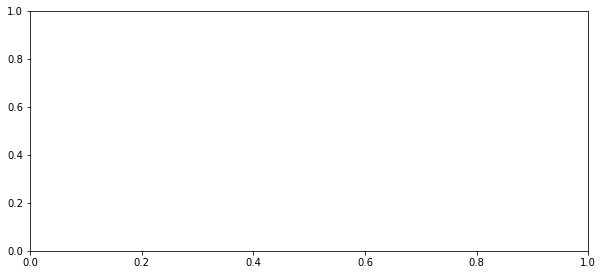

In [17]:
plt.figure(figsize = (10,15))

time = np.arange(0.005, 25.05, 0.05)

plt.subplot(3,1,1)
plt.plot(time, recorded_x)
plt.subplot(3,1,2)
plt.plot(time, recorded_v)
plt.subplot(3,1,3)
plt.plot(time, recorded_a)

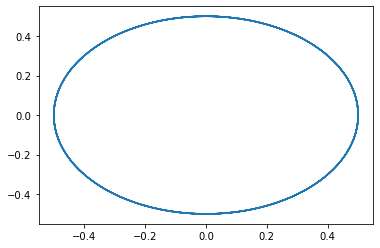

In [73]:
plt.plot(recorded_x,recorded_v)

In [1]:
recorded_x

NameError: name 'recorded_x' is not defined

In [20]:
def H_2(x,v):
    return v**2/(2*m) + 1/2 * k * x**2 + Lambda * x**4

def T_2(v):
    return 1/2 * m * v**2

def V_2(x):
    return 1/2 * k * x**2 + Lambda * x**4



print(H_2(0.5, 0))
H_2(recorded_x, recorded_v)

0.125625


NameError: name 'recorded_x' is not defined

In [75]:
list = [0.01, 1, 10, 100, 500, 1000]
i = 0
while i < 6:
    print(list[i])
    i += 1

0.01
1
10
100
500
1000


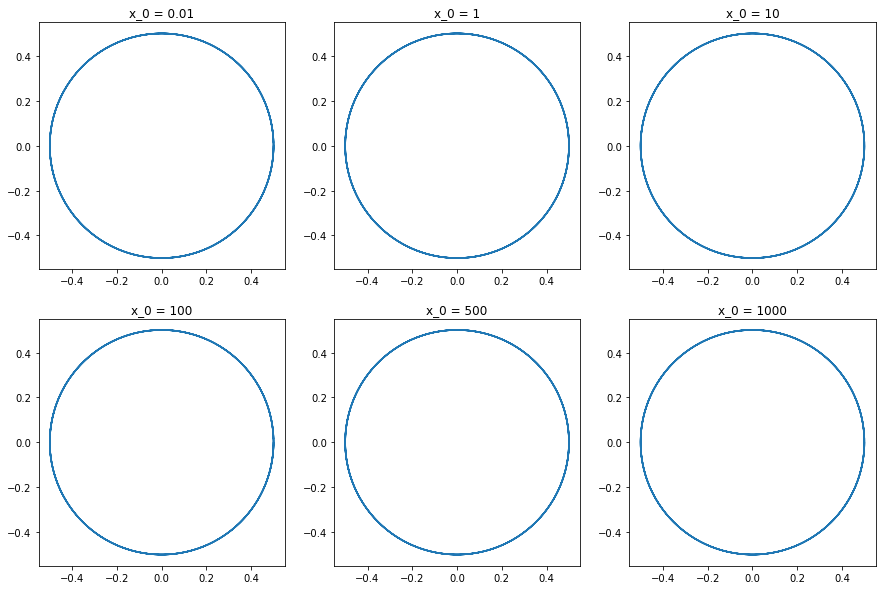

In [77]:
# list of initial conditions
list = [0.01, 1, 10, 100, 500, 1000]
label = ["x_0 = 0.01", "x_0 = 1","x_0 = 10", "x_0 = 100", "x_0 = 500", "x_0 = 1000"]

plt.figure(figsize = (15,10))

i = 0
while i < 6:
    #simulation_2(x_old, v_old, a_old, F_old, k, m, delta_t)
    simulation_2(list[i], 0, F_old/m, -k * list[i] - 4 * Lambda * list[i]**3, 0.005)
    
    plt.subplot(2,3,i+1)
    plt.plot(recorded_x,recorded_v)    
    plt.title(f"{label[i]}")
    i += 1